### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
### EDA

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

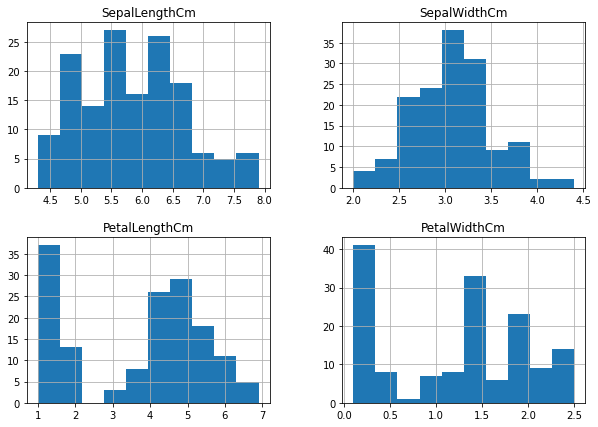

In [12]:
df.hist()
his=plt.gcf()
his.set_size_inches(10,7)


<AxesSubplot:xlabel='Species', ylabel='count'>

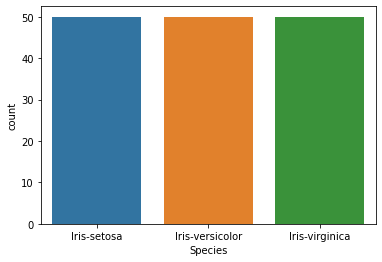

In [13]:
sns.countplot(x='Species',data=df)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

<AxesSubplot:>

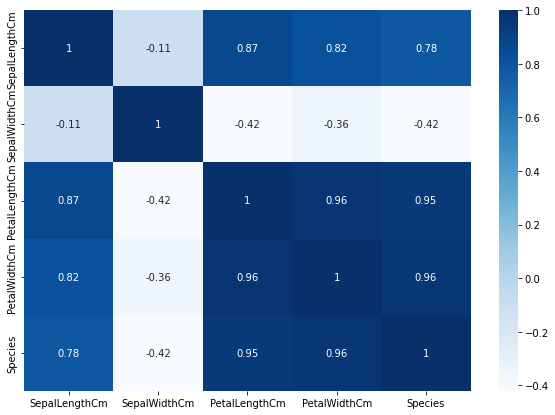

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

### Separating dependent and independent variavles

In [16]:
X=df.drop('Species',axis=1)
y=df.Species

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential([
    tf.keras.Input(shape=(4,)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=3,activation='softmax')
])

In [21]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                125       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 48        
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
4/4 [==============================] - 2s 5ms/step - loss: 1.0565 - accuracy: 0.5250
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0136 - accuracy: 0.5750
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9755 - accuracy: 0.6000
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9414 - accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9098 - accuracy: 0.6333
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8809 - accuracy: 0.6500
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8544 - accuracy: 0.6583
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8271 - accuracy: 0.6500
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.6583
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7760 - accuracy: 0.6583
Epoch 11/50
4/4 [=====================

In [24]:
# Training accuracy
model.evaluate(X_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.9250


[0.290902316570282, 0.925000011920929]

In [25]:
# Testing accuracy
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.2420 - accuracy: 1.0000


[0.24197769165039062, 1.0]

In [26]:
y_hat=model.predict(X_test)
y_hat=np.argmax(y_hat,axis=1)

In [27]:
y_hat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(y_hat,y_test,average='macro')

1.0

In [29]:
accuracy_score(y_test,y_hat)

1.0

<AxesSubplot:>

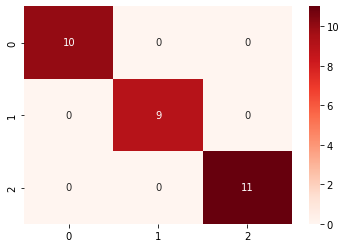

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='Reds')